# GD Variants Batch - Mini-Batch - Stochastic

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
Y = -2 * X + 1
Y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

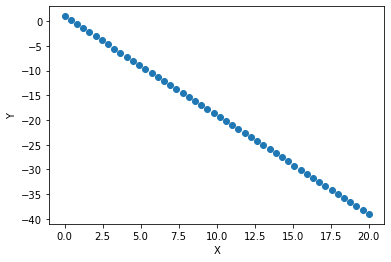

In [4]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y");

## Batch GD

In [5]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_Batch_GD(features_matrix, y_vec, alpha=.01, iterations=1000):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]

    for _ in range(iterations):
        
        # appending theta vector to list
        all_theta_vecs.append(theta_vec)
        
        # Calculate the predicted output
        h_theta = features_matrix @ theta_vec
        h_theta_lst.append(h_theta)
        
        # Calculate loss
        error_vec = h_theta - y_vec
        cost = ((np.linalg.norm(error_vec)) ** 2) / y_vec.shape[0]
        cost_lst.append(cost)
        
        # Calculate gradient descent
        GD = np.array((1/y_vec.shape[0])*(features_matrix.T @ error_vec))
        GD_list.append(round(np.linalg.norm(GD),8))
        
        # Update theta vector
        theta_vec = theta_vec - alpha * GD
        
        
        # Stop conditions
        if len(cost_lst) > 2:
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100 :
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-2]) < 0.001 :
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-1])) < 0.001:
                break
        
    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [6]:
# ploting function
def plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title ="Title", size = (22,5)):
    fix,axes = plt.subplots(1,4,figsize=size)
    plt.suptitle(title,fontsize=20);
 #-----------------------------------------------------------------------#   
    axes[0].plot(np.arange(len(GD_list)),GD_list, label ="alpha = {}".format(alpha),
                             color='blue',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[0].set_xlabel("Number of iterations")
    axes[0].set_ylabel("Gradient")
    axes[0].legend()
#-----------------------------------------------------------------------#
    axes[1].plot(all_theta_vecs[:,0],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[1].set_xlabel("theta0")
    axes[1].set_ylabel("Loss")
    axes[1].legend()
#-----------------------------------------------------------------------#
    axes[2].plot(all_theta_vecs[:,1],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[2].set_xlabel("theta1")
    axes[2].set_ylabel("Loss")
    axes[2].legend()
#-----------------------------------------------------------------------#
    axes[3].plot(np.arange(len(cost)), cost, label ="alpha = {}".format(alpha),
                          color='g',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[3].set_xlabel("Number of iterations")
    axes[3].set_ylabel("Loss")
    axes[3].legend()

In [7]:
# ploting with function
def plot_Batch_with_iter_alpha(x,y, iterations=1000, alpha=.001,title ="Title"):
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst=Linear_Regression_Batch_GD(
        x, y, alpha = alpha, iterations = iterations)
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)

#### Try your function with any input parameterss of your choice.

In [8]:
theta_vec, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Batch_GD(
    X, Y, alpha=.001, iterations=1000)

In [9]:
theta_vec

array([-0.13037674, -1.91021101])

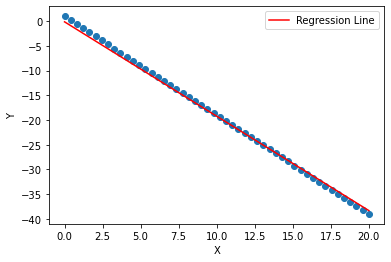

In [10]:
plt.scatter(X,Y);
plt.plot(X,X*theta_vec[1] + theta_vec[0], color ='red',label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

#### Calculate r2 score

In [11]:
Y_pred = X*theta_vec[1] + theta_vec[0]
r2 =r2_score(Y,Y_pred)
print("R2 : ",r2)

R2 :  0.9975950054190024


#### Plot loss vs. epochs

R2 :  0.9975950054190024


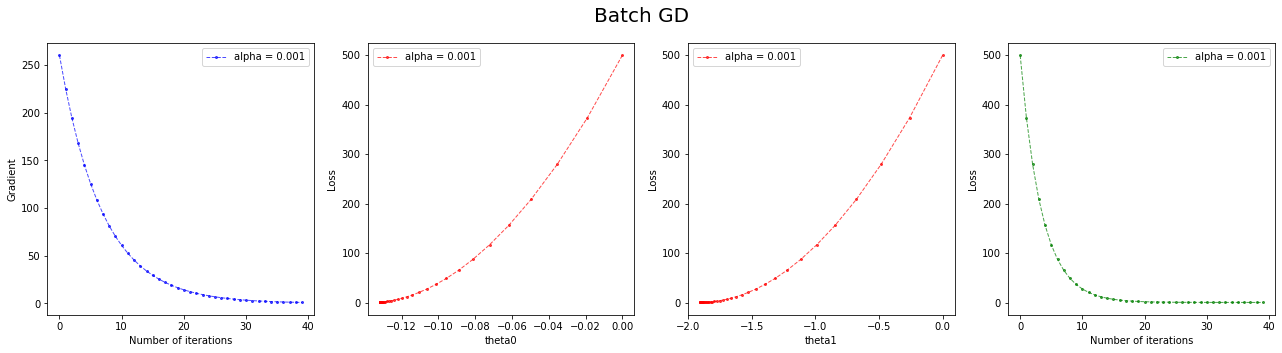

In [12]:
plot_Batch_with_iter_alpha(X,Y,iterations=500, title="Batch GD")

#### Plotting all regression lines till converge

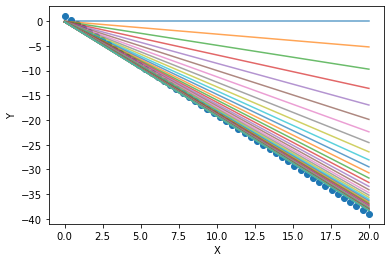

In [14]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
for theta_v in all_theta_vecs:
    plt.plot(X, X*theta_v[1]+ theta_v[0],  alpha=0.7 )

#### Plotting the best regression line

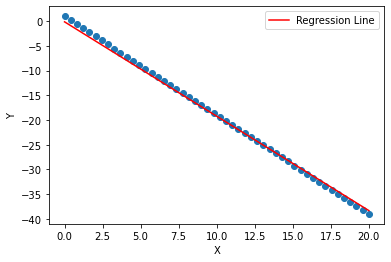

In [15]:
plt.scatter(X,Y)
plt.plot(X, X*theta_vec[1]+ theta_vec[0], color='r',label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

R2 :  0.997450596115865


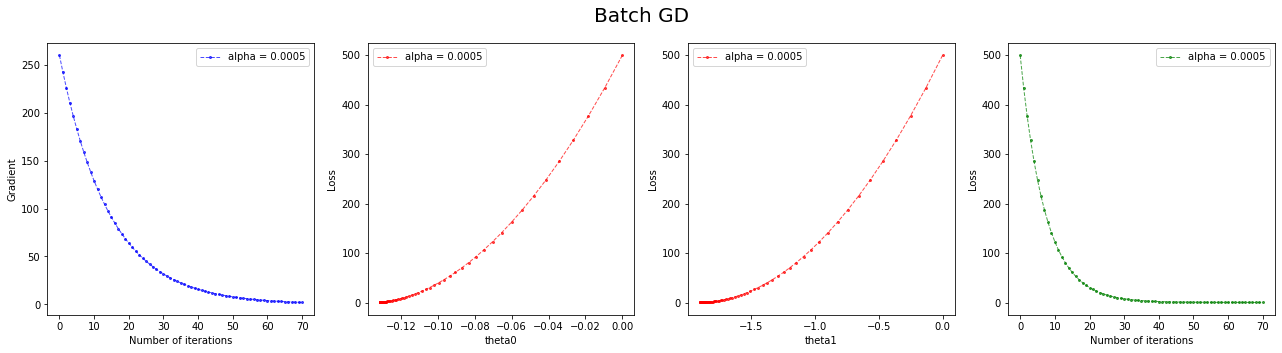

In [16]:
plot_Batch_with_iter_alpha(X,Y,100,.0005,title="Batch GD")

R2 :  0.9985762177144301


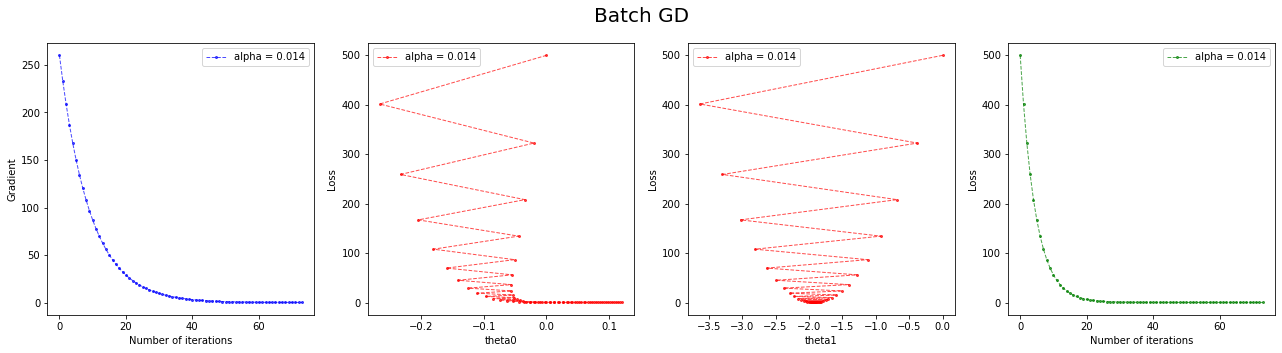

In [17]:
plot_Batch_with_iter_alpha(X,Y, 100,.014,title="Batch GD")

R2 :  -1.2362190845044518e+47


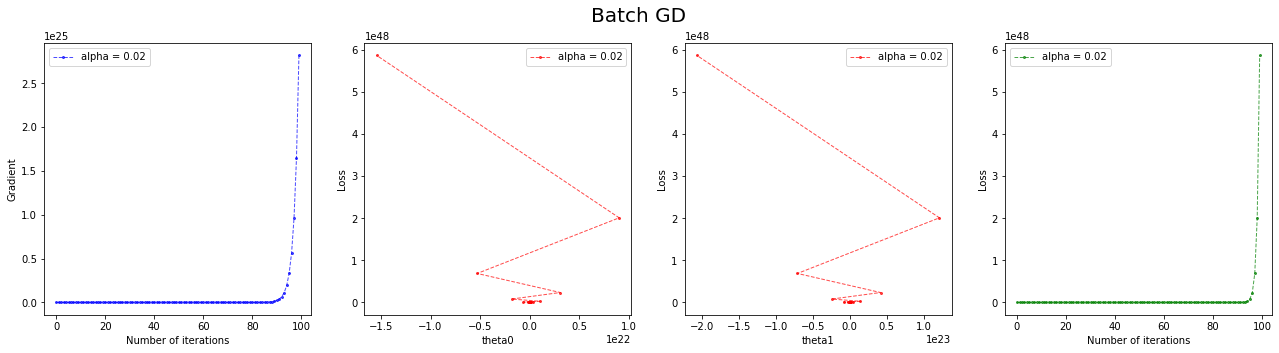

In [18]:
plot_Batch_with_iter_alpha(X,Y, 100,.02,title="Batch GD")

R2 :  -1800.1617897772446


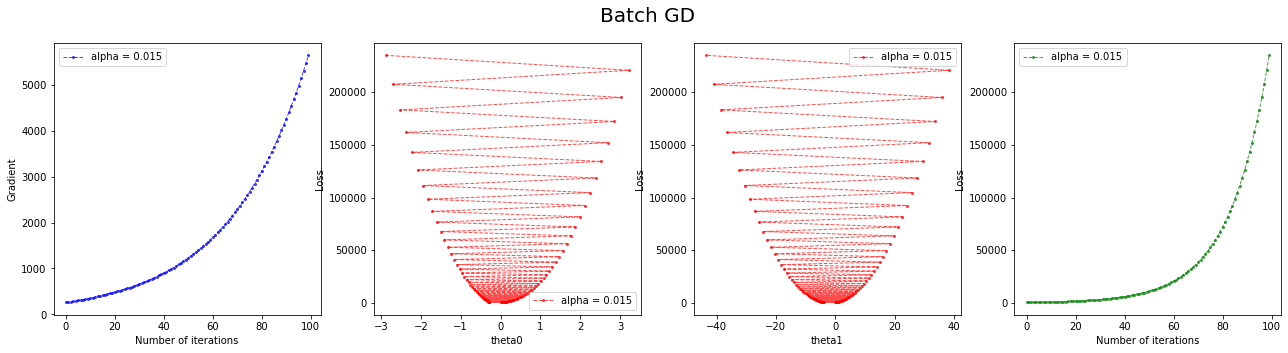

In [19]:
plot_Batch_with_iter_alpha(X,Y, 100,.015,title="Batch GD")

#### The implementation of the Mini-Batch 

In [20]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_Mini_Batch_GD(features_matrix, y_vec, alpha=.01, epochs = 1000, N_batchs = 5):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    
    # Check batch size
    if features_matrix.shape[0] % N_batchs != 0 :
        batch = features_matrix.shape[0] /(features_matrix.shape[0]//N_batchs)
    else:
        batch = N_batchs
    batch_size = int(features_matrix.shape[0] / batch)
    print("Number of batchs :",batch)
    print("Batch Size :",batch_size)
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]
    
    for _ in range(epochs):
        for mini_features_matrix , mini_y_vec in zip(np.split(features_matrix, batch ),np.split(y_vec, batch)):
            
            # appending theta vector to list
            all_theta_vecs.append(theta_vec)
        
            # Calculate the predicted output
            h_theta = mini_features_matrix @ theta_vec
            h_theta_lst.append(h_theta)

            # Calculate loss
            error_vec = h_theta - mini_y_vec
            cost = ((np.linalg.norm(error_vec)) ** 2) / mini_y_vec.shape[0]
            cost_lst.append(cost)

            # Calculate gradient descent
            GD = np.array((1/mini_y_vec.shape[0])*(mini_features_matrix.T @ error_vec))
            GD_list.append(round(np.linalg.norm(GD),8))

            # Update theta vector
            theta_vec = theta_vec - alpha * GD
            

        # Stop conditions
        if len(cost_lst) > (y_vec.shape[0]+1):
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100:
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-(y_vec.shape[0]+1)]) < 0.001:
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-(y_vec.shape[0])])) < 0.01:
                break

    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [21]:
# ploting with function
def plot_Mini_Batch_with_iter_alpha(x,y,N_batchs = 10, epochs=1000, alpha=.001,title ="Title"):
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst=Linear_Regression_Mini_Batch_GD(
        x, y, alpha = alpha, epochs = epochs, N_batchs = N_batchs)
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)

In [22]:
theta_vec, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Mini_Batch_GD(
    X, Y, alpha=.0107, epochs = 1000, N_batchs = 2)

Number of batchs : 2
Batch Size : 25


In [23]:
theta_vec

array([ 0.99966632, -1.98311361])

Number of batchs : 10
Batch Size : 5
R2 :  0.9975837591878118


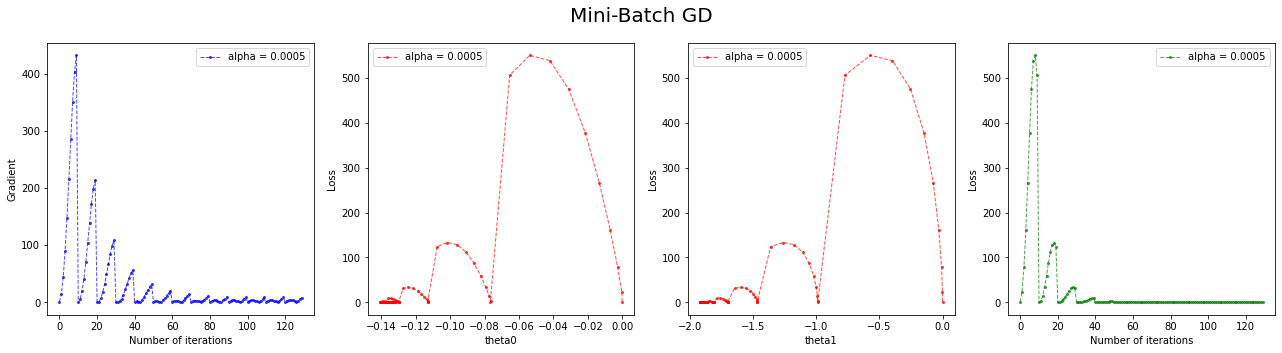

In [24]:
plot_Mini_Batch_with_iter_alpha(X,Y,epochs =10000, alpha =.0005,N_batchs = 10 ,title="Mini-Batch GD")

Number of batchs : 5
Batch Size : 10
R2 :  0.9953033159425755


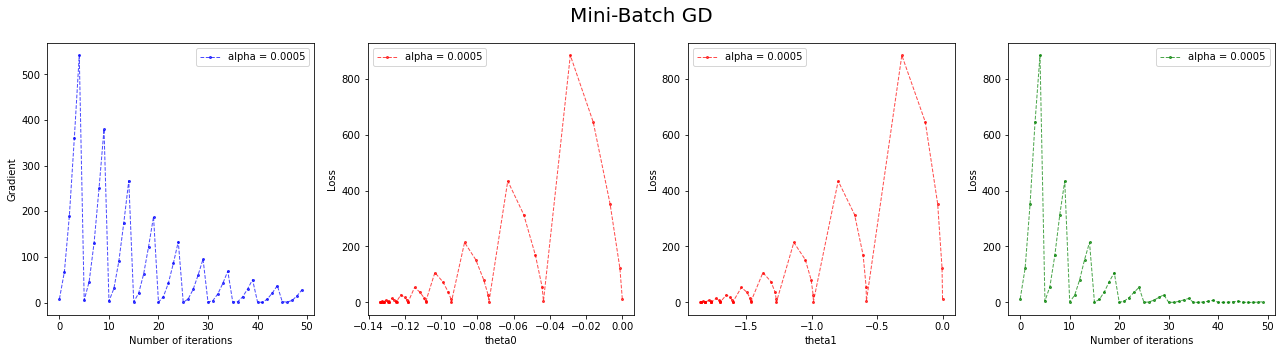

In [25]:
plot_Mini_Batch_with_iter_alpha(X,Y,epochs =10, alpha =.0005,N_batchs = 5 ,title="Mini-Batch GD")

# Using Mini Batch as general function by use number of batchs equal 1 and equal the size of data

Number of batchs : 1
Batch Size : 50
R2 :  0.9976358237484103


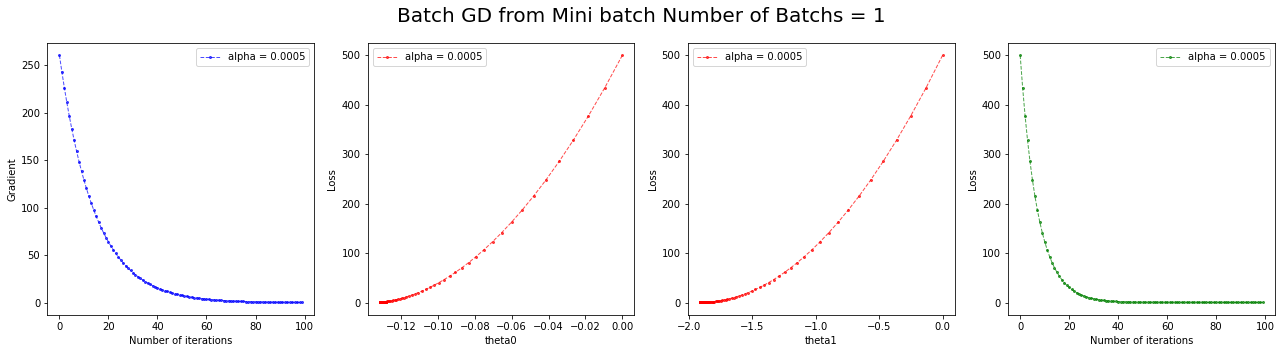

In [26]:
# Number of Batchs = 1 = Batch GD
plot_Mini_Batch_with_iter_alpha(X,Y,epochs =100, alpha =.0005,N_batchs = 1 ,
                                title="Batch GD from Mini batch Number of Batchs = 1")

Number of batchs : 50
Batch Size : 1
R2 :  0.9972051811177324


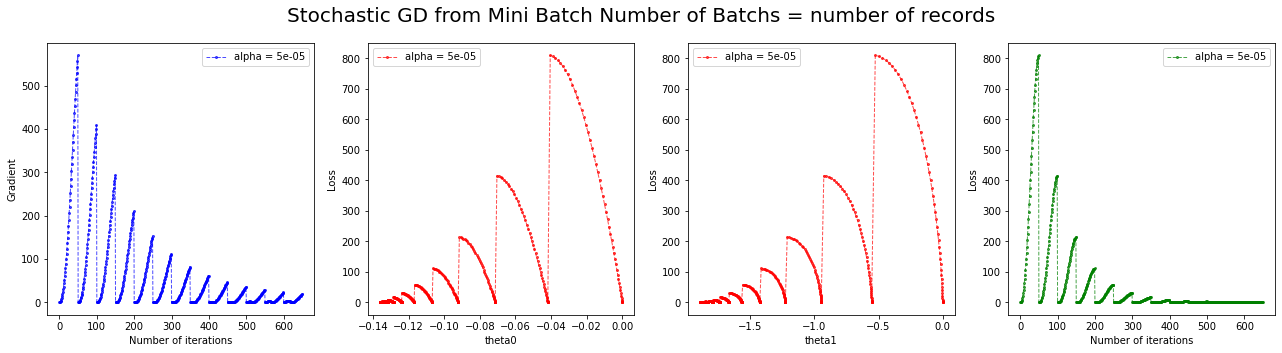

In [27]:
plot_Mini_Batch_with_iter_alpha(X,Y,epochs =300, alpha =.00005,N_batchs = Y.shape[0] ,
                                title="Stochastic GD from Mini Batch Number of Batchs = number of records")

## Stochastic GD

In [29]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_Stochastic_GD(features_matrix, y_vec, alpha=.01, epochs = 1000):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]
    
    for _ in range(epochs):
        for record, y_of_record in zip(features_matrix,y_vec):
            
            # appending theta vector to list
            all_theta_vecs.append(theta_vec)
            
            # Calculate the predicted output
            h_theta = record @ theta_vec
            h_theta_lst.append(h_theta)

            # Calculate loss
            error = h_theta - y_of_record
            cost = 0.5 * error ** 2
            cost_lst.append(cost)

            # Calculate gradient descent
            GD = record * error
            GD_list.append(round(np.linalg.norm(GD),8))

            # Update theta vector
            theta_vec = theta_vec - alpha * GD
            
            
        # Stop conditions
        if len(cost_lst) > (y_vec.shape[0]+1):
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100 :
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-(y_vec.shape[0]+1)]) < 0.001:
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-(y_vec.shape[0])])) < 0.01:
                break

    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [30]:
# ploting with function
def plot_Stochastic_with_iter_alpha(x,y, epochs=1000, alpha=.001,title ="Title"):
    # Getting Data
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Stochastic_GD(
        x, y, alpha = alpha, epochs = epochs)
    # use pre defined plot function
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    # calculate and print r2 
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)

In [31]:
theta_v, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Stochastic_GD(
    X, Y, alpha=.01, epochs = 1000)

In [32]:
all_theta_vecs.shape

(100, 2)

In [33]:
len(cost_lst)

100

In [34]:
theta_v

array([-0.36833559, -1.93263075])

In [35]:
Y_pred = X*theta_v[1] + theta_v[0]
r2 = r2_score(Y,Y_pred)
print("R2 : ",r2)

R2 :  0.9953882984446412


R2 :  0.9959239866703841


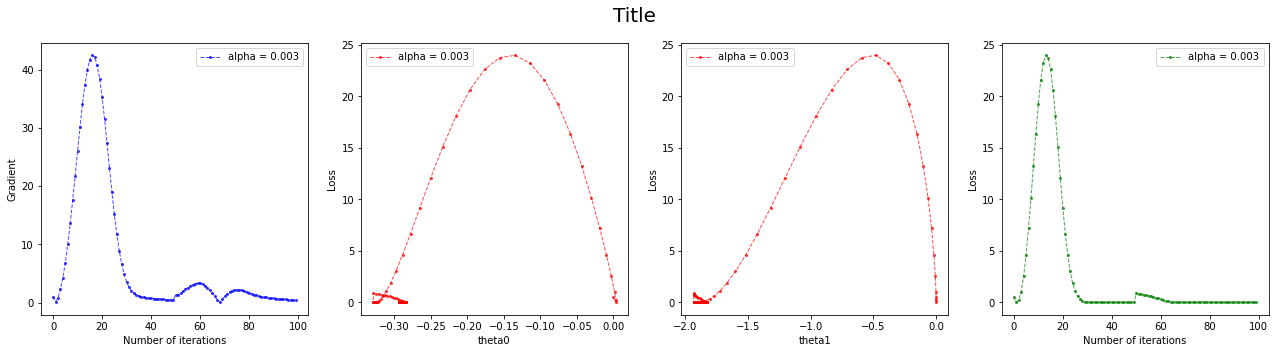

In [36]:
plot_Stochastic_with_iter_alpha(X,Y, epochs=1000, alpha=.003,title ="Title")

R2 :  0.9167869626845647


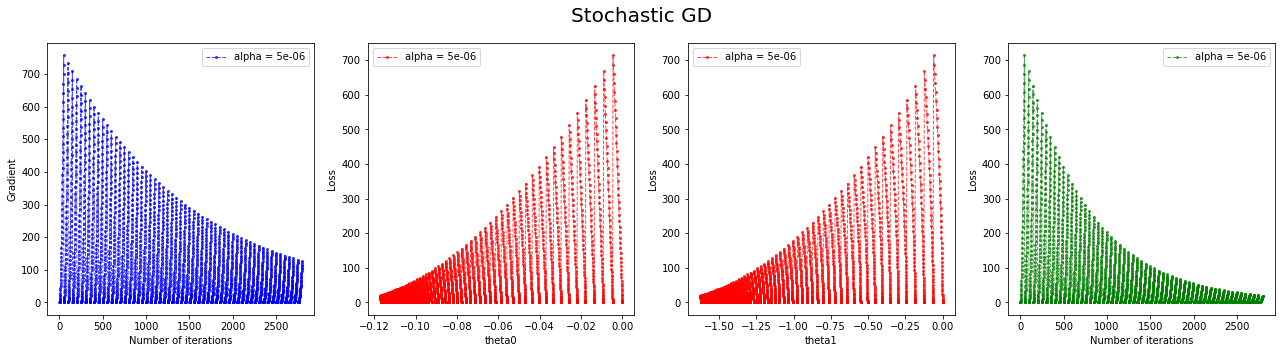

In [42]:
plot_Stochastic_with_iter_alpha(X,Y, epochs=300, alpha=.000005,title ="Stochastic GD")

## we can get the same results by using mini batch function

Number of batchs : 50
Batch Size : 1
R2 :  0.9970120834497482


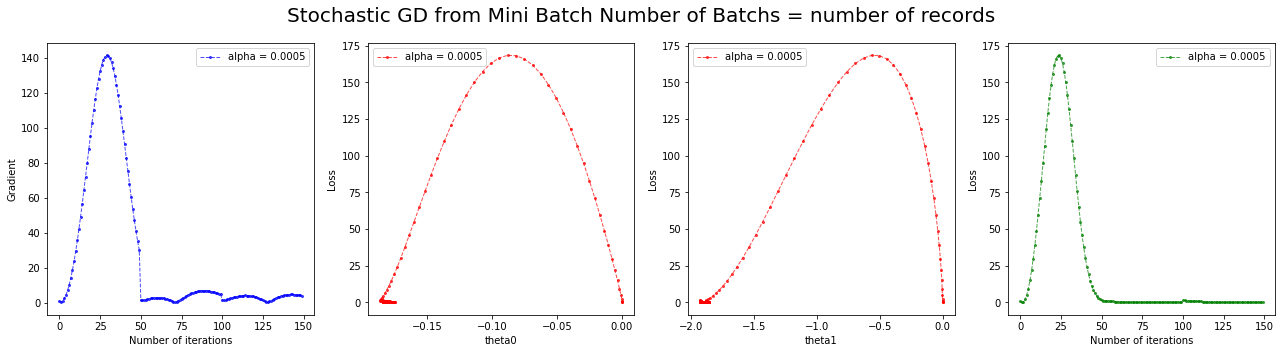

In [38]:
plot_Mini_Batch_with_iter_alpha(X,Y,epochs =300, alpha =.0005,N_batchs = Y.shape[0] ,
                                title="Stochastic GD from Mini Batch Number of Batchs = number of records")